In [110]:
'''
October 2022
Project initially researched for a thesis project by Mariana Paipilla and Catalina Guajardo
'''

'\nOctober 2022\nProject initially researched for a thesis project by Mariana Paipilla and Catalina Guajardo\n'

# Qatar World Cup Sentiment Analysis

On December 2, 2010 Qatar was announced host of the 2022 FIFA World Cup. This is the first time that an Arab country will host this tournament. The present notebook seeks to perform a sentiment analysis towards Qatar before and after the announcement. Moreover, the goal is to understand the perception of people in regards to human rights in this country. 

In [54]:
# Import libraries
import pandas as pd
import snscrape.modules.twitter as sntwitter
import re
import numpy as np
import string
import contractions
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from PIL import Image
from wordcloud import WordCloud, STOPWORDS 
english_stopwords = set(stopwords.words('english')) # Declare stopwords
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [55]:
# Using TwitterSearchScraper to scrape data and append tweets to list
def twitterScrapper(string):
    tweets_list = [] # Creating list to append tweet data to
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper(string).get_items()):
        if i>50000:
            break
        tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
    return tweets_list

## Before

December 02, 2007 - May 02, 2010

In [56]:
# Creating a dataframe from the tweets list above
before_tweets_df = pd.DataFrame(twitterScrapper('Qatar rights until:2010-05-02 since:2007-12-02'), columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [57]:
before_tweets_df.size

2540

In [58]:
# Closer look of tweets
pd.set_option('max_colwidth', None) # To view all characters that must be removed
before_tweets_df.head(30)

,Datetime,Tweet Id,Text,Username
0,2010-05-01 16:39:30+00:00,13197277910,"Rossi dominates MotoGP testing at Sepang Copyright Qatar Olympic Committee, all rights reserved http://bit.ly/bYgaa4",twitvoices
1,2010-05-01 05:00:26+00:00,13171859913,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",hattrickheaven
2,2010-05-01 04:00:14+00:00,13169174049,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",hattrickheaven
3,2010-04-30 13:52:04+00:00,13130199504,Why the hell doesn't Qib in city center open an exchange right next to the Qatar exchange and get some customers,iloveqatar
4,2010-04-30 00:00:26+00:00,13097676230,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",hattrickheaven
5,2010-04-29 23:20:11+00:00,13095781856,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",hattrickheaven
6,2010-04-29 22:00:25+00:00,13092092871,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",hattrickheaven
7,2010-04-29 20:53:59+00:00,13089160378,Is World Cup bid right for Qatar? – National: Kansas City StarIs World Cup bid right for Qatar?NationalCourtesy HH... http://bit.ly/a1yIC5,SportsNewsByMe
8,2010-04-29 10:20:12+00:00,13061179463,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",hattrickheaven
9,2010-04-29 05:00:20+00:00,13051419179,"Qatar Immigration Lawyer, Civil Lawyer, General Practice Appeal, Sexual Harassment Lawyer | Civil Right Lawyers find a www.helplinelaw.com",emarketingseo


### Data pre-processing

In [59]:
# Drop unnecesary columns
before_tweets_df = before_tweets_df.drop(columns=['Datetime', 'Tweet Id','Username'])

In [60]:
# Change tweet column name
before_tweets_df.columns = before_tweets_df.columns.str.replace('Text', 'Original Tweet')

In [61]:
# Add sentiment and tweet column
before_tweets_df['Tweet'] = np.nan
before_tweets_df

,Original Tweet,Tweet
0,"Rossi dominates MotoGP testing at Sepang Copyright Qatar Olympic Committee, all rights reserved http://bit.ly/bYgaa4",NaN
1,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",NaN
2,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",NaN
3,Why the hell doesn't Qib in city center open an exchange right next to the Qatar exchange and get some customers,NaN
4,"Hattrickheaven.com DUBAI, April 28 (Reuters) - Qatar will build 12 air-conditioned outdoor stadiums if it wins the right 2 host the 2022 Wor",NaN
...,...,...
630,"Just got a call from Qatar with great confusion about why I'm not there. Left hand, meet right hand. Now, communicate. *shakes head*",NaN
631,"@mattmansfield re: Qatar. Yes, but no, but kind of yes, and not right now.",NaN
632,Vodafone wins Qatar licence: Vodafone has won the right to become the second mobile phone operator in .. http://tinyurl.com/2llxp8,NaN
633,Vodafone-led consortium gains entry to Qatar: Vodafone has won the right to become the second mobile p.. http://tinyurl.com/3cgrh2,NaN


#### Cleaning

In [62]:
# Pre-processing
def clean_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.compile('https?://\S+|www\.\S+').sub(r'', tweet) # Remove hyperlinks

    if tweet.startswith("rt"): # Remove retweets (repetitions)
        i = tweet.find(':')
        if i != -1:
            tweet = tweet[i+2:]
    
    tweet = re.compile('@[^\s]+').sub(r'', tweet) # Mentions 
    tweet = re.compile(r'#([^\s]+)').sub(r'\1', tweet) # Remove hashtags
    tweet = re.sub('@', 'at', tweet)
    tweet = contractions.fix(tweet) # Fix english contractions
    tweet  = ''.join([char for char in tweet if char not in string.punctuation]) #Remove punctuation characters
    tweet = re.compile('[^A-Za-z]').sub(r' ', tweet) # Remove any other non-alphabet characters
    tweet = ' '.join([w for w in tweet.split() if w not in english_stopwords]) #Remove stop words  
    
    return tweet

In [63]:
before_tweets_df['Tweet'] = before_tweets_df['Original Tweet'].apply(clean_tweet)
pd.reset_option("^display") # Return to normal display

In [64]:
before_tweets_df = before_tweets_df.drop_duplicates(subset=['Tweet']) # Drop duplicate tweets
before_tweets_df.head(20)

,Original Tweet,Tweet
0,Rossi dominates MotoGP testing at Sepang Cop...,rossi dominates motogp testing sepang copyrigh...
1,"Hattrickheaven.com DUBAI, April 28 (Reuters) -...",hattrickheavencom dubai april reuters qatar bu...
3,Why the hell doesn't Qib in city center open a...,hell qib city center open exchange right next ...
7,Is World Cup bid right for Qatar? – National: ...,world cup bid right qatar national kansas city...
9,"Qatar Immigration Lawyer, Civil Lawyer, Genera...",qatar immigration lawyer civil lawyer general ...
10,Cilic passes Russian test at Monte Carlo tenni...,cilic passes russian test monte carlo tennis c...
11,@AdamFlinter I bumped into her next day & she ...,bumped next day said tell uae qatars tourism p...
12,Qatar officials insist the country's blisterin...,qatar officials insist countrys blistering hea...
13,@ice_2big meet my kambal @_caramello_ she's in...,meet kambal qatar right love ni
14,Does anyone know which dialect of Arabic is sp...,anyone know dialect arabic spoken aljazeera qa...


### Obtain sentiment

In [65]:
#Use textblob's sentiment method to analyze sentiment of passed tweet
before_tweets_df[['Polarity', 'Subjectivity']] = before_tweets_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [66]:
#Calculating Negative, Positive, Neutral and Compound values
for index, row in before_tweets_df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        before_tweets_df.loc[index,'Sentiment'] = "negative"
    elif pos > neg:
        before_tweets_df.loc[index,'Sentiment'] = "positive"
    else:
        before_tweets_df.loc[index,'Sentiment'] = "neutral"
    
    before_tweets_df.loc[index,'neg'] = neg
    before_tweets_df.loc[index,'neu'] = neu
    before_tweets_df.loc[index,'pos'] = pos
    before_tweets_df.loc[index,'compound'] = comp

C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [67]:
before_tweets_df.head(10)

,Original Tweet,Tweet,Polarity,Subjectivity,Sentiment,neg,neu,pos,compound
0,Rossi dominates MotoGP testing at Sepang Cop...,rossi dominates motogp testing sepang copyrigh...,0.000000,0.000000,positive,0.000,0.893,0.107,0.0516
1,"Hattrickheaven.com DUBAI, April 28 (Reuters) -...",hattrickheavencom dubai april reuters qatar bu...,0.292857,0.367857,positive,0.000,0.764,0.236,0.5719
3,Why the hell doesn't Qib in city center open a...,hell qib city center open exchange right next ...,0.046429,0.283929,negative,0.295,0.705,0.000,-0.6808
7,Is World Cup bid right for Qatar? – National: ...,world cup bid right qatar national kansas city...,0.285714,0.535714,neutral,0.000,1.000,0.000,0.0000
9,"Qatar Immigration Lawyer, Civil Lawyer, Genera...",qatar immigration lawyer civil lawyer general ...,0.278571,0.623016,negative,0.200,0.800,0.000,-0.5423
10,Cilic passes Russian test at Monte Carlo tenni...,cilic passes russian test monte carlo tennis c...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
11,@AdamFlinter I bumped into her next day & she ...,bumped next day said tell uae qatars tourism p...,0.142857,0.267857,negative,0.177,0.823,0.000,-0.4215
12,Qatar officials insist the country's blisterin...,qatar officials insist countrys blistering hea...,0.292857,0.367857,positive,0.000,0.748,0.252,0.5719
13,@ice_2big meet my kambal @_caramello_ she's in...,meet kambal qatar right love ni,0.392857,0.567857,positive,0.000,0.543,0.457,0.6369
14,Does anyone know which dialect of Arabic is sp...,anyone know dialect arabic spoken aljazeera qa...,0.285714,0.535714,neutral,0.000,1.000,0.000,0.0000


### Results visualization

In [68]:
#New dataframes for all sentiments
before_tweets_negative = before_tweets_df[before_tweets_df['Sentiment']== 'negative']
before_tweets_positive = before_tweets_df[before_tweets_df['Sentiment']== 'positive']
before_tweets_neutral = before_tweets_df[before_tweets_df['Sentiment']== 'neutral']

In [69]:
# Count values of each sentiment 
def count_values_in_column(data,feature):
    total = data.loc[:,feature].value_counts(dropna = False)
    percentage = round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

count_values = count_values_in_column(before_tweets_df,'Sentiment')

In [70]:
count_values

,Total,Percentage
positive,293,48.35
neutral,200,33.00
negative,113,18.65


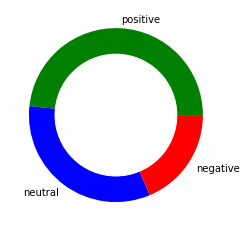

In [71]:
# Pie Chart
sentiments = count_values.index
size = count_values['Percentage']
 
# Create a circle for the center of the plot
circle_chart = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(size, labels=sentiments, colors=['green','blue','red'])
p = plt.gcf()
p.gca().add_artist(circle_chart)
plt.show()

Before Qatar was announced as host, the 3 previous year tweets showed that people had little negative feelings toward this country. On the contrary, positive or neutral sentiments made up more than 80% of the total retreieved data. 

In [72]:
#Function to create Wordcloud
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    stopwords.update(["qatar", "qatars", "right", "rights"])
    wc = WordCloud(stopwords=stopwords, background_color="white", mask = mask, max_words = 3000).generate(text)
    wc.to_file('word_cloud.png')
    
    print('Word Cloud Saved')
    path = 'word_cloud.png'
    display(Image.open(path))

Word Cloud Saved


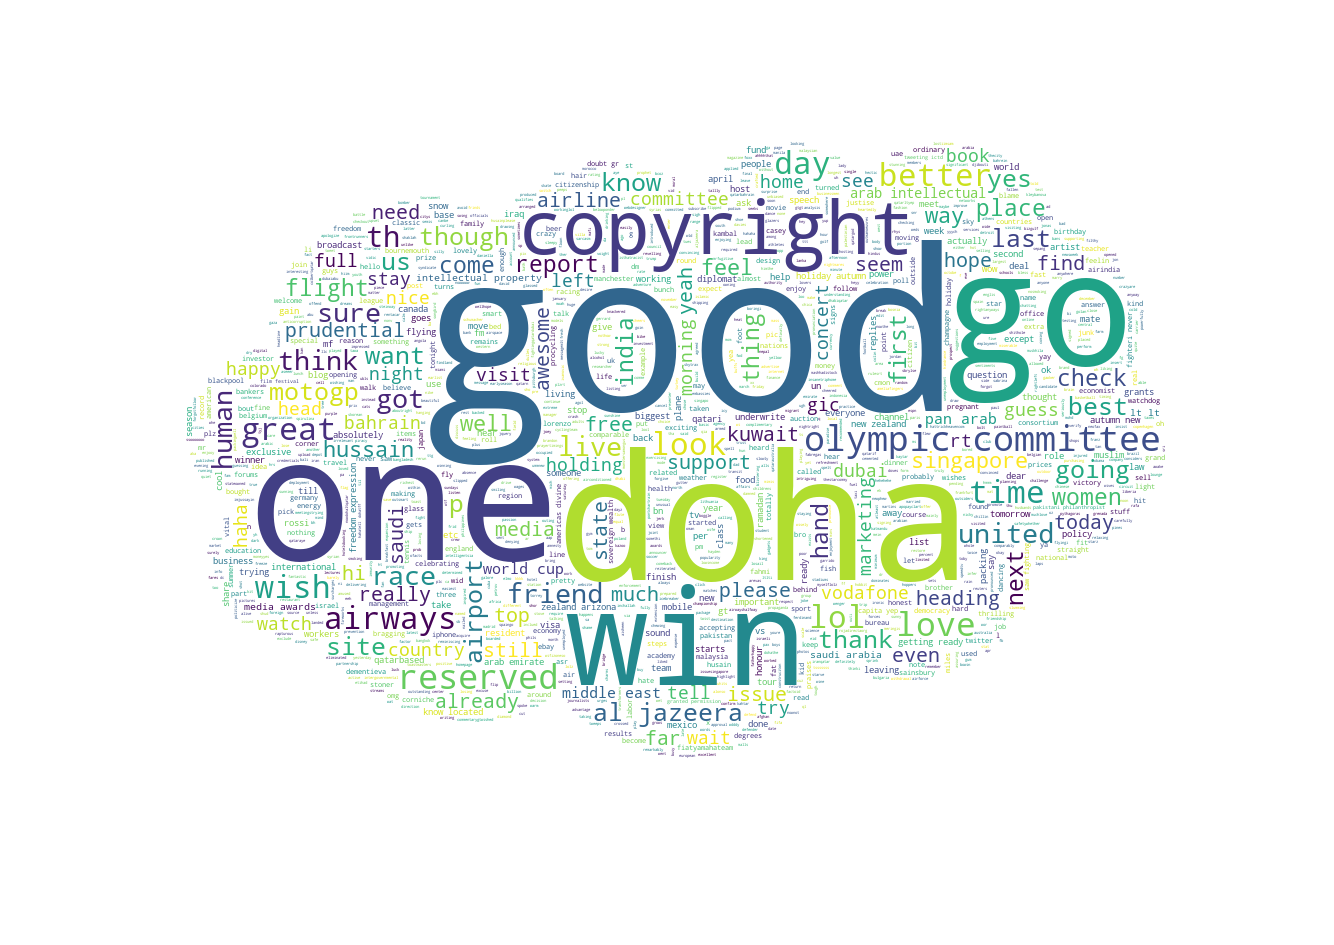

In [73]:
# Positive sentiments Word cloud 
before_positive_values = " ".join(tw for tw in before_tweets_positive.Tweet)
create_wordcloud(before_positive_values)

Word Cloud Saved


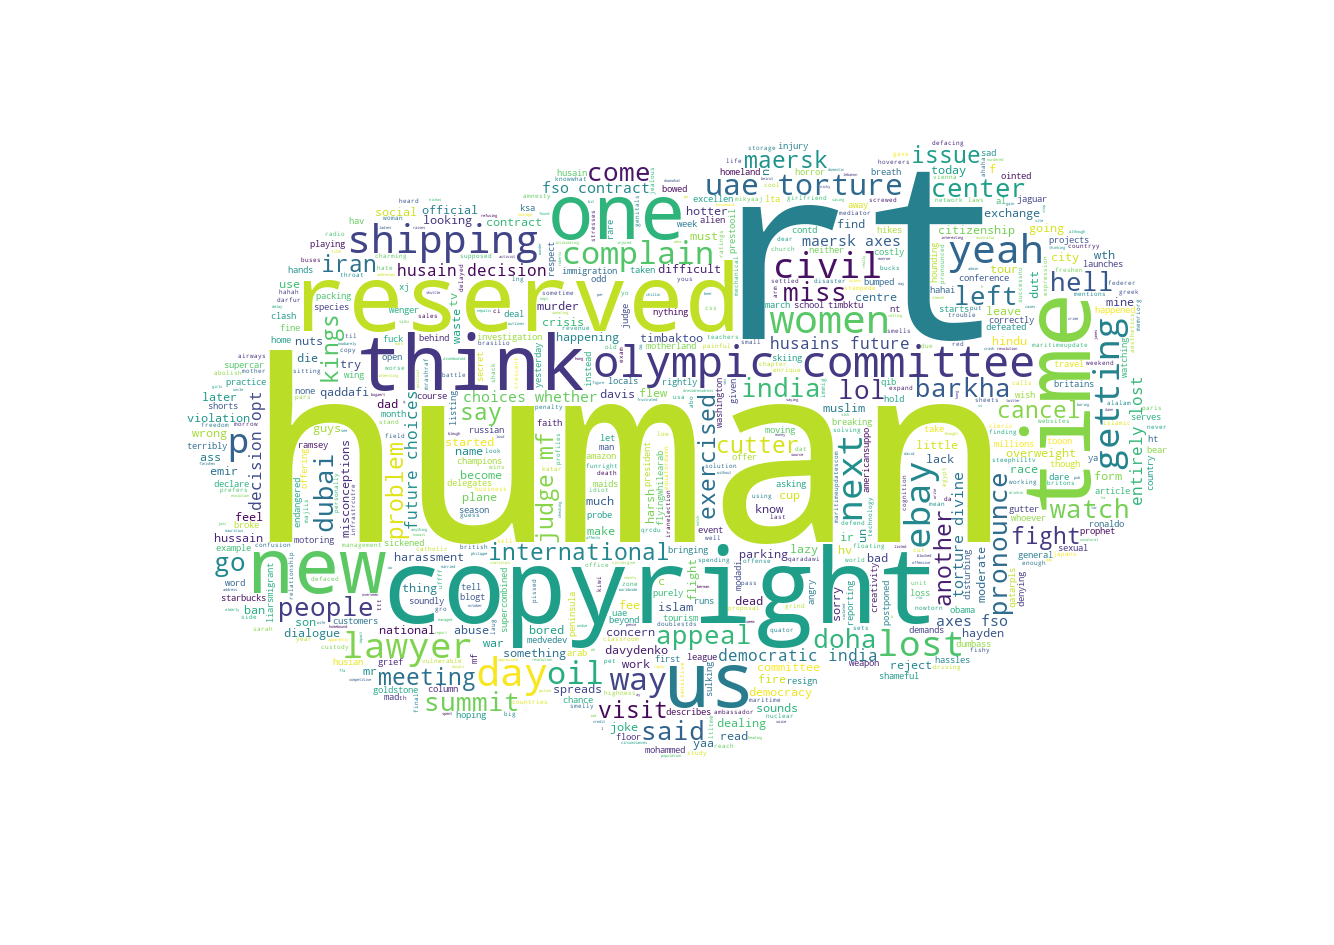

In [74]:
# Negative sentiments Word cloud 
before_negative_values = " ".join(tw for tw in before_tweets_negative.Tweet)
create_wordcloud(before_negative_values)

## During

December 02, 2010 - May 02, 2011

In [75]:
# Creating a dataframe from the tweets list above
during_tweets_df = pd.DataFrame(twitterScrapper('Qatar rights lang:en until:2011-05-02 since:2010-12-02'), columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [76]:
during_tweets_df.size

17780

In [77]:
# Closer look of tweets
pd.set_option('max_colwidth', None) # To view all characters that must be removed
during_tweets_df.head(10)

,Datetime,Tweet Id,Text,Username
0,2011-05-01 23:58:41+00:00,64841198539509760,'Qatar pursuing sustainable development at all levels': He reiterated Qatar's successful bid to win the rights t... http://bit.ly/jwucoA,hayes1098
1,2011-05-01 21:28:33+00:00,64803419713576961,"@baniwalid1 @alihashem_AJA So is NTC Israeli, Al Qaeda, Christian crusader or Qatar ally because that's all just weird right? Or INDEPENDENT",3PDee
2,2011-05-01 12:10:36+00:00,64663005052416000,@Tala_GP I'm from Qatar :) your from Syria right? XD,AlDanaAlSulaiti
3,2011-05-01 09:30:27+00:00,64622702098513920,"@zuEn_lAi i'm in doha, qatar right now. its in the middle east btw. :)",meanttobecyrus
4,2011-04-30 19:00:31+00:00,64403774852177922,"@WoodyRosey please tell her I didn't felt bad 'bout she sad,I know it didn't involve me,man,I would fly right now to Qatar to apolagize",_Yun9
5,2011-04-30 16:29:25+00:00,64365751968079873,@SlaughterAM The reaction of the #Qatar government is worth analysis as well; does a regime with a poor human rights record want to regress?,kishkafka
6,2011-04-30 14:58:19+00:00,64342822874132481,"Right Here, Right Now….A Pit Stop which will make life simpler and Mobile for the people of Qatar... www.qatarday.com",qatarday
7,2011-04-30 11:17:10+00:00,64287168696287232,"UN Human Rights Council resolution against #Syria passed by a vote of 26 to 9, with 7 abstaining\n#Jordan #Qatar #Bahrain Angola were absent",kurdishblogger
8,2011-04-30 11:15:17+00:00,64286695847247872,"Receptionist - Part Time - Up to QAR 6,000 for the right person - Jobs in Qatar – Doha - http://tinyurl.com/5uuqd7r",Jobs_in_Qatar
9,2011-04-30 08:18:08+00:00,64242116301307904,"UN Human Rights Council issued the UN's first condemnation of the violence in #Syria but #Jordan , #Qatar and #Bahrain did not support that!",tameryazar


### Data pre-processing

In [78]:
# Drop unnecesary columns
during_tweets_df = during_tweets_df.drop(columns=['Datetime', 'Tweet Id','Username'])

In [79]:
# Change tweet column name
during_tweets_df.columns = during_tweets_df.columns.str.replace('Text', 'Original Tweet')

In [80]:
# Add sentiment and tweet column
during_tweets_df['Tweet'] = np.nan
during_tweets_df

,Original Tweet,Tweet
0,'Qatar pursuing sustainable development at all levels': He reiterated Qatar's successful bid to win the rights t... http://bit.ly/jwucoA,NaN
1,"@baniwalid1 @alihashem_AJA So is NTC Israeli, Al Qaeda, Christian crusader or Qatar ally because that's all just weird right? Or INDEPENDENT",NaN
2,@Tala_GP I'm from Qatar :) your from Syria right? XD,NaN
3,"@zuEn_lAi i'm in doha, qatar right now. its in the middle east btw. :)",NaN
4,"@WoodyRosey please tell her I didn't felt bad 'bout she sad,I know it didn't involve me,man,I would fly right now to Qatar to apolagize",NaN
...,...,...
4440,says good luck Qatar! hope you'll get the FIFA Worldcup 2022 hosting rights! http://plurk.com/p/9apdh7,NaN
4441,Right now I am depressed and pessimistic that Qatar will be awarded World Cup 2022. #FIFA,NaN
4442,"I don't know: “Qatar established Al Jazeera Sports Channel, which had the exclusive right in the region to telec... http://bit.ly/ejDPVY",NaN
4443,"@SoccerByIves Qatar has paid off lot of people, they shouldn't even be in the runnint, 130 degrees in the summer, right?",NaN


#### Cleaning

In [81]:
during_tweets_df['Tweet'] = during_tweets_df['Original Tweet'].apply(clean_tweet)
pd.reset_option("^display") # Return to normal display

In [82]:
during_tweets_df = during_tweets_df.drop_duplicates(subset=['Tweet']) # Drop duplicate tweets
during_tweets_df.head(10)

,Original Tweet,Tweet
0,'Qatar pursuing sustainable development at all...,qatar pursuing sustainable development levels ...
1,"@baniwalid1 @alihashem_AJA So is NTC Israeli, ...",ntc israeli al qaeda christian crusader qatar ...
2,@Tala_GP I'm from Qatar :) your from Syria rig...,qatar syria right xd
3,"@zuEn_lAi i'm in doha, qatar right now. its in...",doha qatar right middle east way
4,@WoodyRosey please tell her I didn't felt bad ...,please tell felt bad bout sadi know involve me...
5,@SlaughterAM The reaction of the #Qatar govern...,reaction qatar government worth analysis well ...
6,"Right Here, Right Now….A Pit Stop which will m...",right right pit stop make life simpler mobile ...
7,UN Human Rights Council resolution against #Sy...,un human rights council resolution syria passe...
8,"Receptionist - Part Time - Up to QAR 6,000 for...",receptionist part time qar right person jobs q...
9,UN Human Rights Council issued the UN's first ...,un human rights council issued uns first conde...


### Obtain sentiment

In [83]:
#Use textblob's sentiment method to analyze sentiment of passed tweet
during_tweets_df[['Polarity', 'Subjectivity']] = during_tweets_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [84]:
#Calculating Negative, Positive, Neutral and Compound values
for index, row in during_tweets_df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        during_tweets_df.loc[index,'Sentiment'] = "negative"
    elif pos > neg:
        during_tweets_df.loc[index,'Sentiment'] = "positive"
    else:
        during_tweets_df.loc[index,'Sentiment'] = "neutral"
    
    during_tweets_df.loc[index,'neg'] = neg
    during_tweets_df.loc[index,'neu'] = neu
    during_tweets_df.loc[index,'pos'] = pos
    during_tweets_df.loc[index,'compound'] = comp

C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [85]:
during_tweets_df.head(10)

,Original Tweet,Tweet,Polarity,Subjectivity,Sentiment,neg,neu,pos,compound
0,'Qatar pursuing sustainable development at all...,qatar pursuing sustainable development levels ...,0.775000,0.675000,positive,0.000,0.542,0.458,0.8225
1,"@baniwalid1 @alihashem_AJA So is NTC Israeli, ...",ntc israeli al qaeda christian crusader qatar ...,-0.053571,0.415179,negative,0.145,0.855,0.000,-0.1779
2,@Tala_GP I'm from Qatar :) your from Syria rig...,qatar syria right xd,0.285714,0.535714,positive,0.000,0.441,0.559,0.5859
3,"@zuEn_lAi i'm in doha, qatar right now. its in...",doha qatar right middle east way,0.142857,0.267857,neutral,0.000,1.000,0.000,0.0000
4,@WoodyRosey please tell her I didn't felt bad ...,please tell felt bad bout sadi know involve me...,0.128571,0.700794,negative,0.197,0.674,0.129,-0.2960
5,@SlaughterAM The reaction of the #Qatar govern...,reaction qatar government worth analysis well ...,-0.033333,0.266667,positive,0.178,0.517,0.305,0.0516
6,"Right Here, Right Now….A Pit Stop which will m...",right right pit stop make life simpler mobile ...,0.285714,0.535714,negative,0.196,0.804,0.000,-0.2960
7,UN Human Rights Council resolution against #Sy...,un human rights council resolution syria passe...,0.000000,0.100000,neutral,0.000,1.000,0.000,0.0000
8,"Receptionist - Part Time - Up to QAR 6,000 for...",receptionist part time qar right person jobs q...,0.285714,0.535714,neutral,0.000,1.000,0.000,0.0000
9,UN Human Rights Council issued the UN's first ...,un human rights council issued uns first conde...,0.125000,0.216667,negative,0.366,0.509,0.125,-0.7351


### Results visualization

In [86]:
#New dataframes for all sentiments
during_tweets_negative = during_tweets_df[during_tweets_df['Sentiment']== 'negative']
during_tweets_positive = during_tweets_df[during_tweets_df['Sentiment']== 'positive']
during_tweets_neutral = during_tweets_df[during_tweets_df['Sentiment']== 'neutral']

In [87]:
# Count values of each sentiment 
count_values = count_values_in_column(during_tweets_df,'Sentiment')

In [88]:
count_values

,Total,Percentage
positive,1797,46.94
neutral,1105,28.87
negative,926,24.19


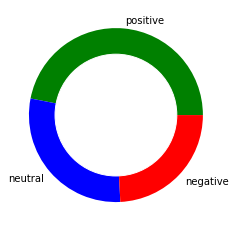

In [89]:
# Pie Chart
sentiments = count_values.index
size = count_values['Percentage']
 
# Create a circle for the center of the plot
circle_chart = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(size, labels=sentiments, colors=['green','blue','red'])
p = plt.gcf()
p.gca().add_artist(circle_chart)
plt.show()

The day Qatar was announced as host and the next 6 months, there is an obvious increase on the number of tweets mentioning this country. The results show that the positive feelings remain leading with almost the same percentage as before. However, there is an increase in the number of negative sentiments and a decrease in the neutral ones. The bias here is that the Twitter users pool grew considerably, almost doubled, from 2010 to 2011.

Word Cloud Saved


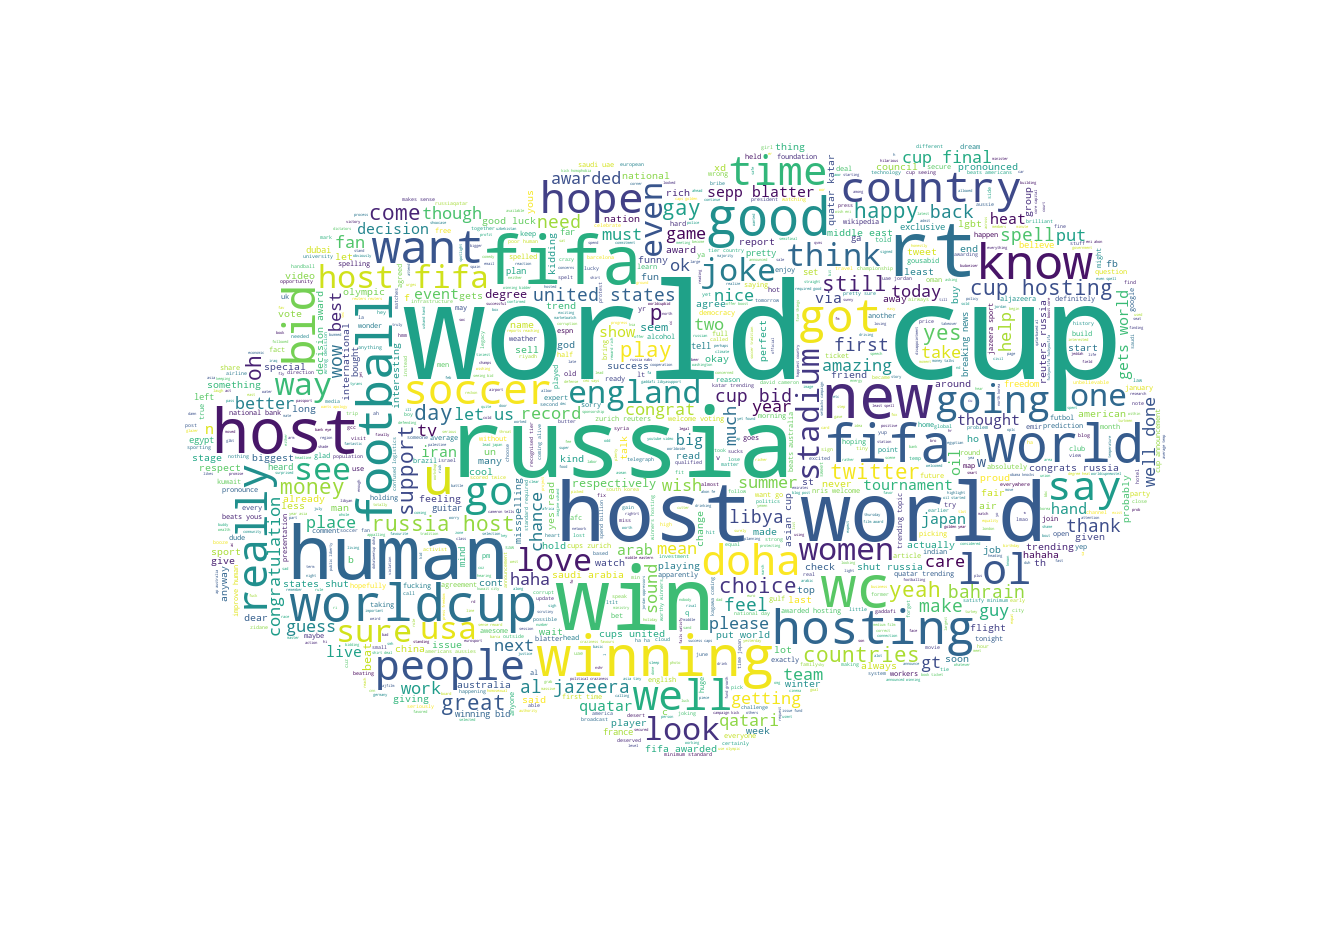

In [90]:
# Positive sentiments Word cloud 
during_positive_values = " ".join(tw for tw in during_tweets_positive.Tweet)
create_wordcloud(during_positive_values)

Word Cloud Saved


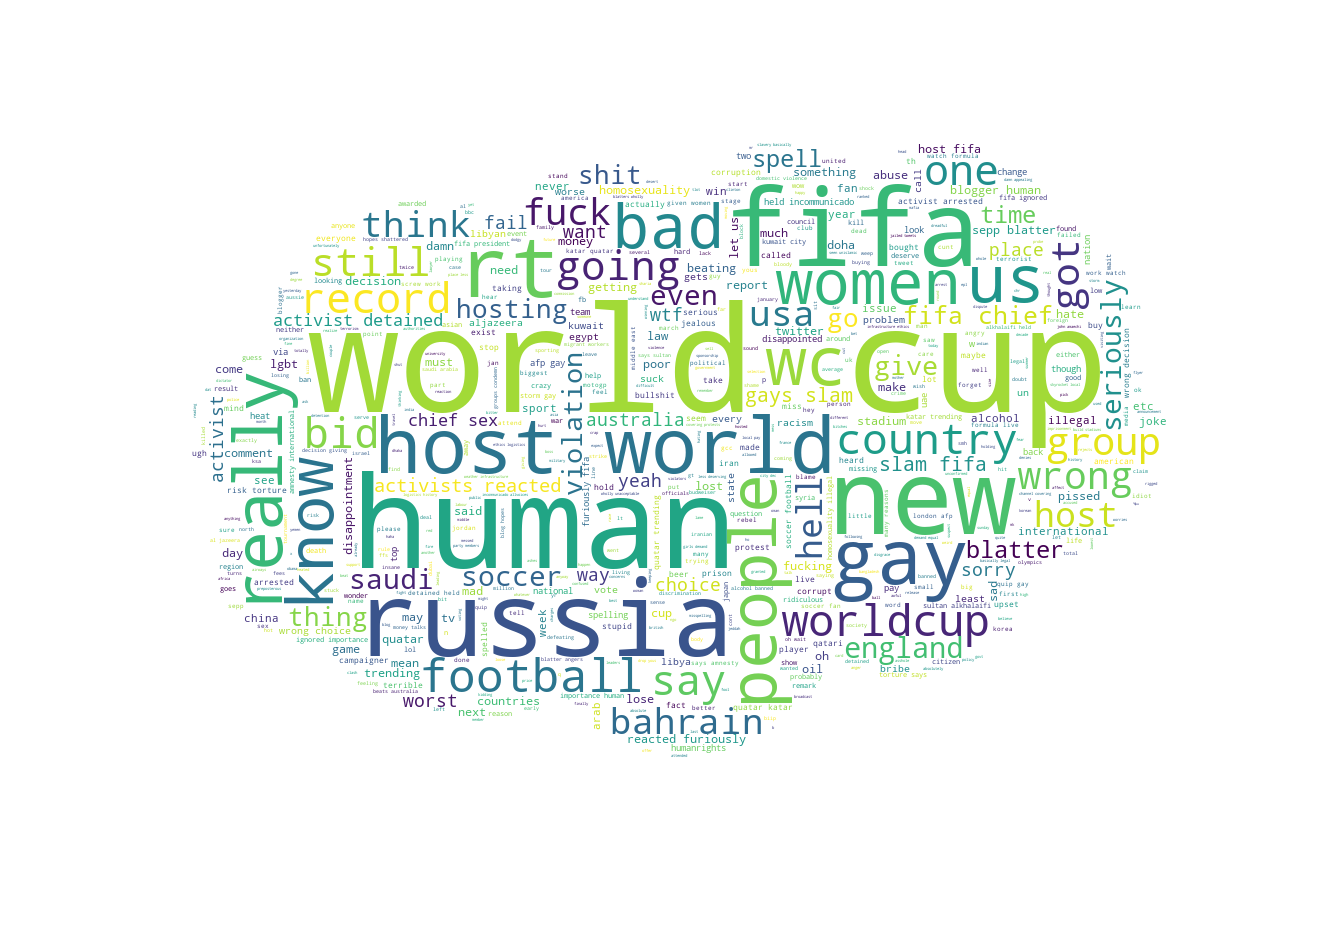

In [91]:
# Negative sentiments Word cloud 
during_negative_values = " ".join(tw for tw in during_tweets_negative.Tweet)
create_wordcloud(during_negative_values)

## After

In [92]:
# Creating a dataframe from the tweets list above
after_tweets_df = pd.DataFrame(twitterScrapper('Qatar rights lang:en until:2022-05-02 since:2011-12-02'), columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [93]:
after_tweets_df.size

200004

In [94]:
# Closer look of tweets
pd.set_option('max_colwidth', None) # To view all characters that must be removed
after_tweets_df.head(10)

,Datetime,Tweet Id,Text,Username
0,2022-05-01 23:41:50+00:00,1520911401774370816,"Join the conversation on the Environment, Climate Justice &amp; the Rights of Nature with #WCCL2022plenary speaker Damilola Olawuyi, Professor of Petroleum, Energy &amp; Environmental Law at HBKU Law School Qatar. World Congress of Constitutional Law 5 - 9 Dec https://t.co/JGuRLVoxhS https://t.co/pvPyhHD0rK",iacl_aidc
1,2022-05-01 20:22:35+00:00,1520861259247276039,SHOUT-OUT TO THE STATE OF QATAR DUNNO WHAT HAPPENED THERE WITH THE TAG\nPS FIX UR HUMAN RIGHTS,atmostonetour
2,2022-05-01 19:29:03+00:00,1520847788216619008,In a statement to QNA on the occasion of the International Workers' Day al-Dosari stressed that the efforts and plans of the Ministry of Labour are continuing in terms of development in mechanisms for protecting workers' rights. https://t.co/upTlvA8Y2Y,GulfTimes_QATAR
3,2022-05-01 18:20:32+00:00,1520830546305236994,"@StevenSibbet @OpenshawJack Saudi Arabia, Qatar, Bahrain all have lots of space as well. In fact, ""they"" would fit right in there.",nij108
4,2022-05-01 17:30:26+00:00,1520817937388654593,"@cdesetfree @HHichilema @joseph_kalimbwe Africa is not a special case, USA has bases in Germany, South Korea, Bharain,Qatar, Japan, Botswana(did I say that ?), these are bilateral agreements based on mutual interests. Zambia has a right as a sovereign state to associate with whoever they want. We don’t have to like it.",mrzee88906359
5,2022-05-01 16:48:19+00:00,1520807336876650499,@pepeSZNafc19 @OGAride @KaptanJustice And no they don’t deserve military aid they’re too busy getting it from saber rattling states like Iran and countries like Qatar that have horrendous records on human rights. *That’s* who Palestine is modeling themselves after. That’s who they want to align themselves with,RealAnyaBriggs
6,2022-05-01 16:16:24+00:00,1520799308831989761,@denkmit Or maybe we should all be more tolerant. in Qatar I did not see you complain about the few women in the VIP or about their few rights.,Carmelo_hp
7,2022-05-01 16:16:00+00:00,1520799208269299713,Get Jarrod Bowen on that plane to Qatar right now!,ChesnoidGaming
8,2022-05-01 15:31:15+00:00,1520787943459364869,"@BlipVanished @LucyAKACecilia @Acyn Yes, and? qatar, saudi arabia, morocco, all of those murder and beat their population and are your allies, israel occupying palestine and slaughter children... you only defend human rights where there are economic interests.",anticiclons
9,2022-05-01 14:34:27+00:00,1520773651079086083,DUTY MANAGER QATAR WORLD CUP 2022 EVENT JOB VACANCY AT RIGHT SEAT https://t.co/AK4gf2qMZ0,DutableI


### Data pre-processing

In [95]:
# Drop unnecesary columns
after_tweets_df = after_tweets_df.drop(columns=['Datetime', 'Tweet Id','Username'])

In [96]:
# Change tweet column name
after_tweets_df.columns = after_tweets_df.columns.str.replace('Text', 'Original Tweet')

In [97]:
# Add sentiment and tweet column
after_tweets_df['Tweet'] = np.nan
after_tweets_df

,Original Tweet,Tweet
0,"Join the conversation on the Environment, Climate Justice &amp; the Rights of Nature with #WCCL2022plenary speaker Damilola Olawuyi, Professor of Petroleum, Energy &amp; Environmental Law at HBKU Law School Qatar. World Congress of Constitutional Law 5 - 9 Dec https://t.co/JGuRLVoxhS https://t.co/pvPyhHD0rK",NaN
1,SHOUT-OUT TO THE STATE OF QATAR DUNNO WHAT HAPPENED THERE WITH THE TAG\nPS FIX UR HUMAN RIGHTS,NaN
2,In a statement to QNA on the occasion of the International Workers' Day al-Dosari stressed that the efforts and plans of the Ministry of Labour are continuing in terms of development in mechanisms for protecting workers' rights. https://t.co/upTlvA8Y2Y,NaN
3,"@StevenSibbet @OpenshawJack Saudi Arabia, Qatar, Bahrain all have lots of space as well. In fact, ""they"" would fit right in there.",NaN
4,"@cdesetfree @HHichilema @joseph_kalimbwe Africa is not a special case, USA has bases in Germany, South Korea, Bharain,Qatar, Japan, Botswana(did I say that ?), these are bilateral agreements based on mutual interests. Zambia has a right as a sovereign state to associate with whoever they want. We don’t have to like it.",NaN
...,...,...
49996,Qatar strongly condemns the storming of forces to Al Zwaitina oil seaport in Libya and stopping the export of oil; and stressed that the country's wealth belongs to the Libyans and neither party has the right to manipulate Libyan capabilities or use it as a pressure card. #QNA https://t.co/67trQ67gOQ,NaN
49997,Qatar: Reform Efforts Fail to Remedy Rights Abuses https://t.co/tOVCVA0NM9 #Rights2020,NaN
49998,@Mardini333 Human rights are a hoax. \nI do not understand the meaning of the Human Rights Association. Why did you find. And why is the regime of Qatar and Turkey controlled by them while they are terrorists? https://t.co/TvfRaQSGhL,NaN
49999,"Just watched @GNev2 in Qatar. What a great programme, not just about football but also about human rights across the region. gives hope of a good world cup in 2022. \n\n#comeonengland\n#SkySports \n@SkySportsNews",NaN


#### Cleaning

In [98]:
after_tweets_df['Tweet'] = after_tweets_df['Original Tweet'].apply(clean_tweet)
pd.reset_option("^display") # Return to normal display

In [99]:
after_tweets_df = after_tweets_df.drop_duplicates(subset=['Tweet']) # Drop duplicate tweets
after_tweets_df.head(10)

,Original Tweet,Tweet
0,"Join the conversation on the Environment, Clim...",join conversation environment climate justice ...
1,SHOUT-OUT TO THE STATE OF QATAR DUNNO WHAT HAP...,shoutout state qatar know happened tag ps fix ...
2,In a statement to QNA on the occasion of the I...,statement qna occasion international workers d...
3,"@StevenSibbet @OpenshawJack Saudi Arabia, Qata...",saudi arabia qatar bahrain lots space well fac...
4,@cdesetfree @HHichilema @joseph_kalimbwe Afric...,africa special case usa bases germany south ko...
5,@pepeSZNafc19 @OGAride @KaptanJustice And no t...,deserve military aid busy getting saber rattli...
6,@denkmit Or maybe we should all be more tolera...,maybe tolerant qatar see complain women vip ri...
7,Get Jarrod Bowen on that plane to Qatar right ...,get jarrod bowen plane qatar right
8,"@BlipVanished @LucyAKACecilia @Acyn Yes, and? ...",yes qatar saudi arabia morocco murder beat pop...
9,DUTY MANAGER QATAR WORLD CUP 2022 EVENT JOB VA...,duty manager qatar world cup event job vacancy...


### Obtain sentiment

In [100]:
#Use textblob's sentiment method to analyze sentiment of passed tweet
after_tweets_df[['Polarity', 'Subjectivity']] = after_tweets_df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [101]:
#Calculating Negative, Positive, Neutral and Compound values
for index, row in after_tweets_df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    if neg > pos:
        after_tweets_df.loc[index,'Sentiment'] = "negative"
    elif pos > neg:
        after_tweets_df.loc[index,'Sentiment'] = "positive"
    else:
        after_tweets_df.loc[index,'Sentiment'] = "neutral"
    
    after_tweets_df.loc[index,'neg'] = neg
    after_tweets_df.loc[index,'neu'] = neu
    after_tweets_df.loc[index,'pos'] = pos
    after_tweets_df.loc[index,'compound'] = comp

C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\pgr01\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [102]:
after_tweets_df.head(10)

,Original Tweet,Tweet,Polarity,Subjectivity,Sentiment,neg,neu,pos,compound
0,"Join the conversation on the Environment, Clim...",join conversation environment climate justice ...,0.000000,0.000000,positive,0.000,0.765,0.235,0.7717
1,SHOUT-OUT TO THE STATE OF QATAR DUNNO WHAT HAP...,shoutout state qatar know happened tag ps fix ...,0.000000,0.100000,neutral,0.000,1.000,0.000,0.0000
2,In a statement to QNA on the occasion of the I...,statement qna occasion international workers d...,0.000000,0.000000,negative,0.118,0.882,0.000,-0.3400
3,"@StevenSibbet @OpenshawJack Saudi Arabia, Qata...",saudi arabia qatar bahrain lots space well fac...,0.342857,0.467857,positive,0.000,0.662,0.338,0.5574
4,@cdesetfree @HHichilema @joseph_kalimbwe Afric...,africa special case usa bases germany south ko...,0.321429,0.553571,positive,0.000,0.654,0.346,0.8225
5,@pepeSZNafc19 @OGAride @KaptanJustice And no t...,deserve military aid busy getting saber rattli...,0.000000,0.166667,positive,0.140,0.627,0.232,0.1280
6,@denkmit Or maybe we should all be more tolera...,maybe tolerant qatar see complain women vip ri...,0.000000,0.000000,positive,0.194,0.388,0.419,0.4404
7,Get Jarrod Bowen on that plane to Qatar right ...,get jarrod bowen plane qatar right,0.285714,0.535714,neutral,0.000,1.000,0.000,0.0000
8,"@BlipVanished @LucyAKACecilia @Acyn Yes, and? ...",yes qatar saudi arabia morocco murder beat pop...,0.100000,0.150000,neutral,0.185,0.630,0.185,-0.2500
9,DUTY MANAGER QATAR WORLD CUP 2022 EVENT JOB VA...,duty manager qatar world cup event job vacancy...,0.285714,0.535714,neutral,0.000,1.000,0.000,0.0000


### Results visualization

In [103]:
#New dataframes for all sentiments
after_tweets_negative = after_tweets_df[after_tweets_df['Sentiment']== 'negative']
after_tweets_positive = after_tweets_df[after_tweets_df['Sentiment']== 'positive']
after_tweets_neutral = after_tweets_df[after_tweets_df['Sentiment']== 'neutral']

In [104]:
# Count values of each sentiment 
count_values = count_values_in_column(after_tweets_df,'Sentiment')

In [105]:
count_values

,Total,Percentage
positive,20987,45.16
negative,19116,41.14
neutral,6368,13.70


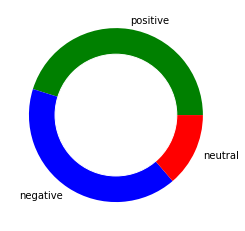

In [106]:
# Pie Chart
sentiments = count_values.index
size = count_values['Percentage']

# Create a circle for the center of the plot
circle_chart = plt.Circle((0,0), 0.7, color = 'white')
plt.pie(size, labels = sentiments, colors = ['green','blue','red'])
p = plt.gcf()
p.gca().add_artist(circle_chart)
plt.show()

After the announcement of Qatar as host and until present time, the number of tweets increased again drastically. The percentage of positive tweets had only a small decrease. However, something interesting occurs, the negative sentiments almost doubled to 41% and the neutral ones now belong to the minor opinion.

Word Cloud Saved


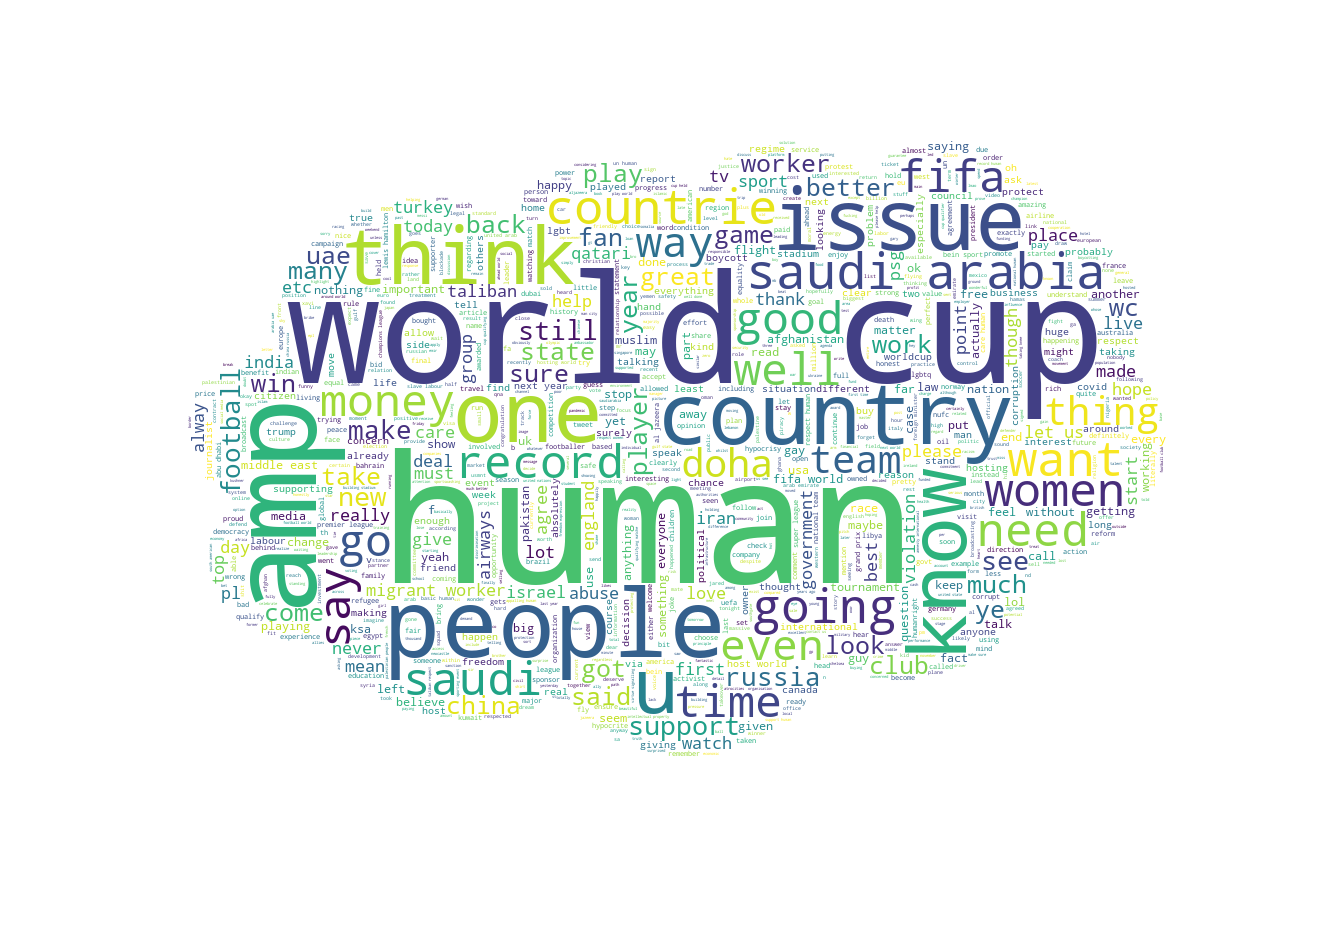

In [107]:
# Positive sentiments Word cloud 
after_positive_values = " ".join(tw for tw in after_tweets_positive.Tweet)
create_wordcloud(after_positive_values)

Word Cloud Saved


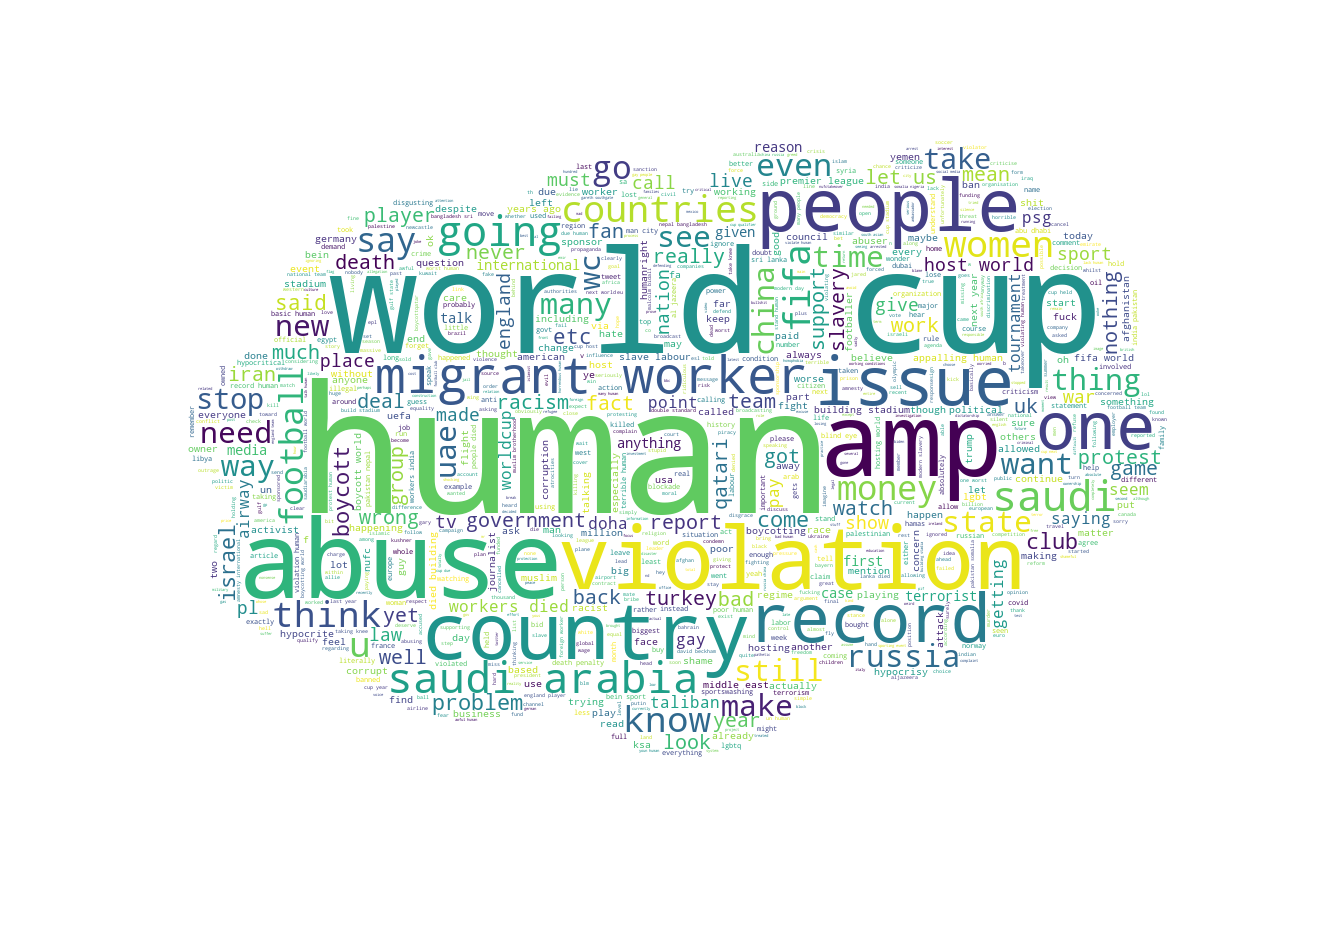

In [108]:
# Negative sentiments Word cloud 
after_negative_values = " ".join(tw for tw in after_tweets_negative.Tweet)
create_wordcloud(after_negative_values)